###  Unsupervised method for face similarity<br>
<b> <u> DataSet used is BioID :</u></b>  <br>
<ul><li>The dataset consists of 1521 gray level images with a resolution of 384×286 pixel.Each one shows the frontal view of a face of one out of 23 different test persons.
The images are labeled “BioID_xxxx.pgm” where the characters xxxx are replaced by the index of the current image (with leading zeros) .</li>
<li> Consecutive Image-Id’s didn’t belong to same person so can’t label it using consecutive image-Id , hence dataset is not suitable for supervised learning.</li></ul>

###  First approach 
<ol><li> Used HaarCascade Classifier for face detection.Since images are mostly the frontal view of a face so 
    didn't used any face alignment technique for straightening of image face.</li>
    <li>Once face is detected face is cropped from image and passed through <b> Facenet pre-trained model </b> to extract face embedding of 128-d.</li>
    <li> Used cosine similarity method to calculate similarity between different embeddings.If cosine similarity is above 0.5 then images are similar.</li><br>
used threshold of 0.5 for now to consider two faces to be similar.

In [94]:
import os
import glob
import cv2
import numpy as np

from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline


Given below function hase been used for Cosine Similarity

In [95]:
def dot(A,B): 
    
    return (sum(a*b for a,b in zip(A,B)))

def cosine_similarity(a,b):
    
    return dot(a,b) / ( (dot(a,a) **.5) * (dot(b,b) ** .5) )

### Load Haarcascade xml file and load the model

In [96]:

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

# load the model

model = load_model('facenet_keras.h5')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Haarcascade function

We have defined haarcascade function to identify the face in the given image and crop the extract from the image 

In [17]:
def haarcascade(img,required_size=(160, 160)):
    
    (x,y,w,h) = face_detector.detectMultiScale(img, 1.3, 5)[0]
    
    face = img[y:y+h, x:x+w]
    
    face = cv2.resize(face,required_size)  
    
    return np.expand_dims(face,axis=0).reshape((1,160,160,3))

### similarity function for returning the similarity score value and is_similar(string) for two faces in an image.

In [97]:
def similarity(img1_path, img2_path,th=0.5):#path of the image.
    '''
    img1_path : absolute path of first image.
    img2_path : absolute path of second image.
    th :(0-1) threshold value for cosine similarity above which face-embeddings are considered similar.
    '''
    
    img1 = cv2.imread(img1_path)
    
    img2 = cv2.imread(img2_path)
    
    try:
        face1 = haarcascade(img1)
        face2 = haarcascade(img2)
        face1_pixels = face1.astype('float32')
        
        # standardize pixel values across channels (global)
        
        mean, std = face1_pixels.mean(), face1_pixels.std()
        
        face1_pixels = (face1_pixels - mean) / std
        face2_pixels = face2.astype('float32')
        
        # standardize pixel values across channels (global)
        
        mean, std = face2_pixels.mean(), face2_pixels.std()
        
        face2_pixels = (face2_pixels - mean) / std
        
        emb1 = model.predict(face1_pixels)[0]
        emb2 = model.predict(face2_pixels)[0]
        
        score = np.round(cosine_similarity(emb1,emb2),2)
        
        if score>th:
            return score, "Similar"
        else:
            return score, "Not Similar"
    
    except:
        
        print("face not detected")
    
     

In [98]:
def show(img1Path, img2Path, score, is_similar):
    '''
    plot image
    '''
    plt.suptitle(str(score) + "_" + is_similar)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.imread(img1Path,0), cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.imread(img2Path,0), cmap='gray')
    plt.axis('off')
      

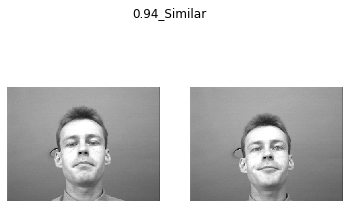

In [99]:
img1_path= "BioID-FaceDatabase-V1.2/BioID_0042.pgm"
img2_path = "BioID-FaceDatabase-V1.2/BioID_0045.pgm"
score, is_similar = similarity(img1_path, img2_path)
show(img1_path, img2_path, score, is_similar)